<a href="https://colab.research.google.com/github/ktoyesh04/Sparks-Data-Science-Internship/blob/main/PredictionUsingLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sparks Internship Task - Prediction Using Supervised Algorithm
- Predict the percentage of an student based on the number of study hours.
- This is a simple linear regression task as it involves two variables.
- Data can be found [here](https://bit.ly/w-data) or [here](https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv).
- What will be predicted score if a student studies 9.25 hours/day ?
- [Sample solution](https://bit.ly/2HxiGGJ)

### Importing Necessary Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

### Loading Data

In [ ]:
# Reading the dataset from the provided link
url = "https://bit.ly/w-data"
df = pd.read_csv(url)

,Hours,Scores
0,2.5,21
1,5.1,47


# Exploratory Data Analysis

### Display the first few rows of data

In [ ]:
df.head()

### Descriptive statistics of the dataset

In [ ]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Finding correlation between studey hours and scores

In [ ]:
correlation = df['Hours'].corr(df['Scores'])
correlation

0.9761906560220887

A correlation close to 1 implies a strong positive correlation.

### Checking for outliers

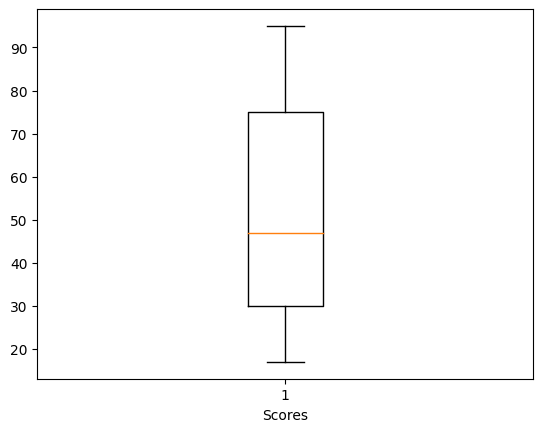

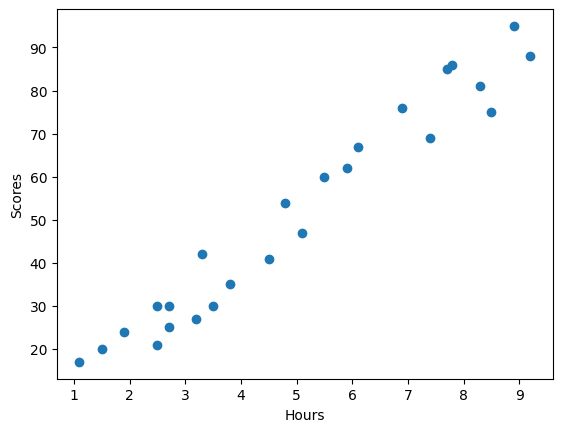

In [ ]:
plt.boxplot(df['Scores'])
plt.xlabel('Scores')
plt.show()

plt.scatter(df['Hours'], df['Scores'])
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

No outliers found.

# Model Training

### Splitting data into training and testing sets and training the model


In [ ]:
X, y = df.iloc[:, :-1].values, df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Calculating R-squared value
R_2 == 1 implies perfect fit

In [ ]:
R_2 = model.score(X_train, y_train)
R_2

0.943706685921912

### Get coefficients of the regression line

In [ ]:
intercept, slope = model.intercept_, model.coef_[0]
intercept, slope

(1.8707455429497628, 9.958192132017091)

### Plot the regression line for training data

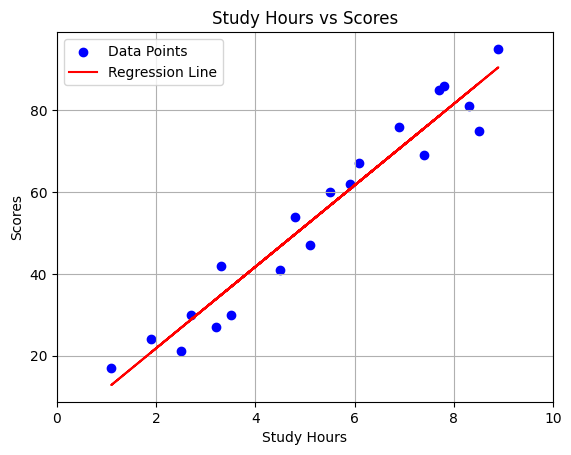

In [ ]:
plt.scatter(X_train, y_train, color='blue', label='Data Points')
plt.plot(X_train, model.predict(X_train), color='red', label='Regression Line')
plt.title('Study Hours vs Scores')
plt.xlabel('Study Hours')
plt.ylabel('Scores')
plt.legend()
plt.xlim(0, 10)
plt.grid(True)
plt.show()


# Model Evaluation

### Mean Absolute Error (MAE)


In [ ]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 4.076318697509944


### Predicting score

In [ ]:
# predicted score for 9.5 hours
hours_to_predict = [[9.5]]
predicted_score = model.predict(hours_to_predict)
predicted_score

array([96.4735708])

### Plot the regression line for both training data and testing data

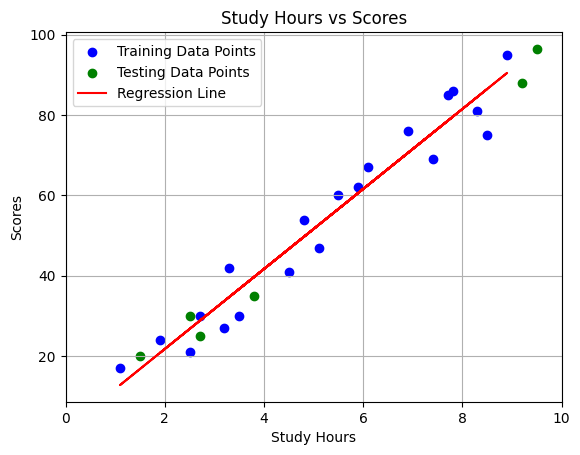

In [ ]:
plt.scatter(X_train, y_train, color='blue', label='Training Data Points')
plt.scatter(X_test, y_test, color='green', label='Testing Data Points')
plt.plot(X_train, model.predict(X_train), color='red', label='Regression Line')
plt.scatter(hours_to_predict, predicted_score, color='green')
plt.title('Study Hours vs Scores')
plt.xlabel('Study Hours')
plt.ylabel('Scores')
plt.legend()
plt.xlim(0, 10)
plt.grid(True)
plt.show()
